In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
hospitalization = "Hospitalization.csv"
county_statistics = "county_statistics.csv"
diagnostics = "Diagnostics.csv"
demographics = "Demographics.csv"
tests = "Tests.csv"
# Read the Covid data and the study results
hospitalization_data = pd.read_csv(hospitalization)
county_statistics_data = pd.read_csv(county_statistics)
diagnostics_data = pd.read_csv(diagnostics)
#demographics_data = pd.read_csv(demographics) no county key
#tests_data = pd.read_csv(tests)
#hospitalization_data.head() # remove "Latitude" "Longitude"
#county_statistics_data.head()
#diagnostics_data.head()
#tests_data.head()
#demographics_data.head() no county key
diagnostics_data = diagnostics_data.rename(columns={'COUNTY': 'county'})
tests_data = tests_data.rename(columns={'County': 'county'})
# Combine the data into a single dataset
combined_covid = pd.merge(county_statistics_data, diagnostics_data, how="right", on=["county", "county"])
# Display the data table for preview
county_graph_state = combined_covid.loc[(combined_covid["state"] == 'MI')]
#county_graph = combined_covid.loc[(combined_covid["county"] == 'Kalamazoo') | (combined_covid["county"] == 'Monroe') | (combined_covid["county"] == 'Wayne')
                                   #| (combined_covid["county"] == 'Washtenaw')]
#county_graph_state = county_graph.loc[(county_graph["state"] == 'MI')]
county_graph_state.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,MessageDate,Negative,Positive,Total
0,30.0,Alcona,MI,0.68,0.28,6179.0,4201.0,1732.0,0.686,0.303,...,3357.0,78.3,14.0,7.5,0.2,9.3,3/17/2020,1,0,1
1,30.0,Alcona,MI,0.68,0.28,6179.0,4201.0,1732.0,0.686,0.303,...,3357.0,78.3,14.0,7.5,0.2,9.3,3/20/2020,2,0,2
2,30.0,Alcona,MI,0.68,0.28,6179.0,4201.0,1732.0,0.686,0.303,...,3357.0,78.3,14.0,7.5,0.2,9.3,3/23/2020,1,0,1
3,30.0,Alcona,MI,0.68,0.28,6179.0,4201.0,1732.0,0.686,0.303,...,3357.0,78.3,14.0,7.5,0.2,9.3,3/24/2020,1,0,1
4,30.0,Alcona,MI,0.68,0.28,6179.0,4201.0,1732.0,0.686,0.303,...,3357.0,78.3,14.0,7.5,0.2,9.3,3/25/2020,2,0,2


<function matplotlib.pyplot.show(close=None, block=None)>

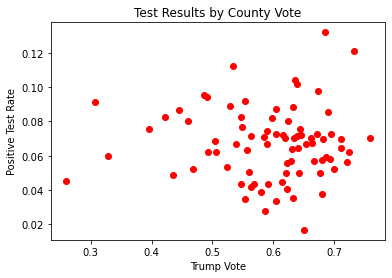

In [120]:
negatives = county_graph_state.groupby('county')['Negative'].sum()
positives = county_graph_state.groupby('county')['Positive'].sum()
total_test = county_graph_state.groupby('county')['Total'].sum()
candidate_link = county_graph_state.groupby('county')['percentage20_Joe_Biden'].mean()
candidate2_link = county_graph_state.groupby('county')['percentage20_Donald_Trump'].mean()
negative_pct = negatives/total_test
positive_pct = positives/total_test
negative_pct
positive_pct
county_names = county_graph_state["county"].unique()
positive_pct
#x_axis = ['kalamazoo', 'Wayne', 'Washtenaw', 'Monroe']
plt.scatter(candidate2_link, positive_pct, color = 'red')
plt.xlabel("Trump Vote")
plt.ylabel("Positive Test Rate")
plt.title("Test Results by County Vote")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

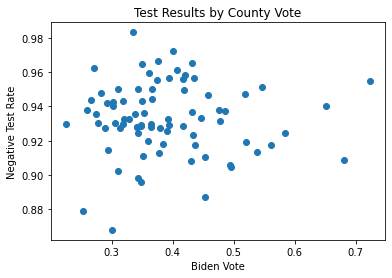

In [116]:
plt.scatter(candidate_link, negative_pct)
plt.xlabel("Biden Vote")
plt.ylabel("Negative Test Rate")
plt.title("Test Results by County Vote")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

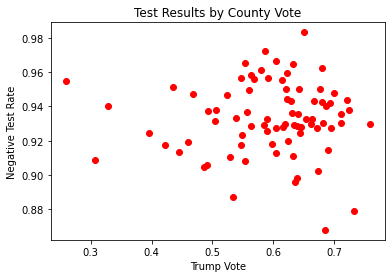

In [115]:
plt.scatter(candidate2_link, negative_pct, color = 'red')
plt.xlabel("Trump Vote")
plt.ylabel("Negative Test Rate")
plt.title("Test Results by County Vote")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

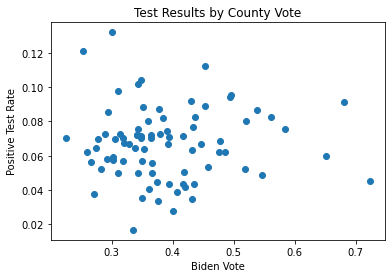

In [119]:
plt.scatter(candidate_link, positive_pct)
plt.xlabel("Biden Vote")
plt.ylabel("Positive Test Rate")
plt.title("Test Results by County Vote")
plt.show